In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

# Wave 5 (1997)

In [409]:
df = pd.read_csv('df_1997.csv', low_memory=False)
df = df.iloc[:, 12:] # Start column from sex_of_respondent
df.head()

,sex_of_respondent,marital_status_of_respondent,age_on_last_birthday,respondent's_years_of_schooling,is_there_a_second_person_in_household,sex_of_person_2,relation_of_person_2_to_resp.,whether_the_child_is_biological_or_not,whether_the_child_is_biological_or_not.1,whether_the_child_is_biological_or_not.2,...,"1997_family_income_--_$65,000+","1997_family_income_--_$105,000+","1997_wife's_income_--_$65,000+","1997_wife's_income_--_$100,000+",marital_instability_1997,marital_happiness_1997,marital_problems_1997,marital_interaction_1997,marital_disagreements_1997,1997_sexrole_traditionalism_scale
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN
1,male,Married,39,12,Yes,Female,SPOUSE OF RESPONDENT,NaN,NaN,NaN,...,35000.0,35000.0,NaN,NaN,0.00,24.5,0.0,13.0,1.0,18.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN
3,female,Married,44,18,Yes,Male,SPOUSE OF RESPONDENT,NaN,Child from current marriage,Child from current marriage,...,65000.0,75000.0,7800.0,9000.0,0.48,23.0,5.0,12.0,7.0,15.0
4,female,Separated,49,12,No,NaN,NaN,NaN,NaN,NaN,...,27500.0,27500.0,27500.0,27500.0,NaN,NaN,99.0,NaN,NaN,17.0


In [411]:
df.duplicated().sum()

954

In [412]:
df.drop_duplicates(inplace=True)

In [413]:
df.shape

(1079, 626)

In [414]:
person_n_list = [col for col in df.columns if 'relation_of_person_' in col.lower()]
print(person_n_list)

['relation_of_person_2_to_resp.', 'relation_of_person_3_to_resp.', 'relation_of_person_4_to_resp.', 'relation_of_person_5_to_resp.', 'relation_of_person_6_to_resp.', 'relation_of_person_7_to_resp.', 'relation_of_person_8_to_resp.', 'relation_of_person_9_to_resp.', 'relation_of_person_10_to_resp']


In [416]:
len(df)

1079

In [417]:
for i in df[person_n_list]:
    print(df[i].value_counts() / len(df) * 100)
    print()
    # print(df[i].value_counts())

relation_of_person_2_to_resp.
SPOUSE OF RESPONDENT              83.410565
CHILD OF RESPONDENT/SPOUSE         5.560704
OTHER / NON-RELATIVE - SPECIFY     1.946247
OTHER RELATIVE -SPECIFY            0.278035
GRANDCHILD OF RESPONDENT           0.278035
PARENT OF RESPONDENT               0.185357
REF                                0.092678
Name: count, dtype: float64

relation_of_person_3_to_resp.
CHILD OF RESPONDENT/SPOUSE       44.114921
SPOUSE OF RESPONDENT              1.575533
PARENT OF RESPONDENT              1.390176
OTHER / NON-RELATIVE -SPECIFY     1.112141
OTHER RELATIVE -SPECIFY           1.019462
GRANDCHILD OF RESPONDENT          0.834106
Name: count, dtype: float64

relation_of_person_4_to_resp.
CHILD OF RESPONDENT/SPOUSE        24.096386
SPOUSE OF RESPONDENT               1.575533
GRANDCHILD OF RESPONDENT           1.297498
OTHER RELATIVE -SPECIFY            1.204819
OTHER / NON-RELATIVE - SPECIFY     0.648749
REF                                0.092678
Name: count, dtype: fl

Shows that from relation of person 6 to 10 are very small portion of the entire dataset, so drop to get more clear dataset

In [420]:
df = df.drop(columns=[col for col in df.columns if 'person_' in col.lower() and any(str(i) in col for i in range(6,11))])

In [423]:
# dropping columns relating to previous studies
previous_waves = [
    col for col in df.columns if any(i in col for i in ["1980", "1983", "1988", "1992"])
]
df.drop(columns=previous_waves, inplace=True)
changes = [col for col in df.columns if "change" in col]
changes = changes[:-3]
df.drop(columns=changes, inplace=True)

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 0 to 2020
Columns: 562 entries, sex_of_respondent to 1997_sexrole_traditionalism_scale
dtypes: float64(74), object(488)
memory usage: 4.6+ MB


## Change null values 

In [428]:
possible_nan = [
    "DK",
    "INAP",
    "REF",
    "97",
    "997",
    "9997",
    "99997",
    "999997",
    "97.0",
    "997.0",
    "9997.0",
    "99997.0",
    "999997.0",
]
df.replace(
    to_replace=possible_nan,
    value=None,
    inplace=True,
)

In [430]:
# try converting to numerical
for col in df.columns:
    df[col] = df[col].astype(np.float32, errors="ignore")

In [431]:
for k, v in pd.Series(df.values.flatten()).value_counts().items():
    print(f"{k:<50} |  {v}")

No                                                 |  45370
Yes                                                |  23080
Agree                                              |  17394
Disagree                                           |  15996
Never                                              |  12657
Very happy                                         |  7498
Sometimes                                          |  7167
Great deal                                         |  5535
Pretty happy                                       |  4760
Strongly agree                                     |  4543
Not true                                           |  4469
Strongly disagree                                  |  4062
1.0                                                |  3888
2.0                                                |  3435
Quite a bit                                        |  3408
Child from current marriage                        |  3144
Often                                              

In [436]:
# which columns could contain nullable values
possible_nan.extend([97.0, 997.0, 9997.0])
for col in df.columns:
    is_nan = set(df[col].values).intersection(set(possible_nan))
    if is_nan:
        print(f"{col:<50} | {is_nan}")

number_of_days_since_r_spoke_to_child_2            | {9997.0}
number_of_days_since_spoke_to_child_3              | {9997.0}
number_of_days_since_r_spoke_to_child_4            | {9997.0}
days_since_last_contacted_mother?                  | {9997.0}
days_since_last_contacted_father?                  | {9997.0}
days_since_last_talked_to_spouse's_mothe           | {9997.0}
days_since_last_talked_to_spouse's_dad             | {9997.0}
number_of_relatives_r_contacts                     | {97.0}
value_of_wife's_property                           | {9997.0}


In [438]:
for col in df.columns:
    is_nan = set(df[col].values).intersection(set(possible_nan))
    if is_nan:
        df[col] = df[col].replace(to_replace=is_nan, value=None)

In [439]:
for col in df.columns:
    df[col] = df[col].astype(np.float32, errors="ignore")

In [440]:
# perform label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 0 to 2020
Columns: 562 entries, sex_of_respondent to 1997_sexrole_traditionalism_scale
dtypes: float32(101), int32(461)
memory usage: 2.3 MB


## find correlations

In [445]:
corr = df.corr()['marital_instability_1997']
corr_df = corr.reindex(corr.abs().sort_values(ascending=False).index)
print(corr_df.drop('marital_instability_1997'))

how_long_ago_did_you_become_widowed?        -1.000000
r_thinking_about_divorce_now                -0.730077
either_partner_suggested_idea_of_divorce    -0.716035
r_thought_about_divorce_in_last_3_years      0.669889
spouse_thinking_of_divorce_now              -0.660792
spouse_feel_marriage_in_trouble_now         -0.625539
spouse_thought_of_divorce_in_last_3_year     0.603331
feels_marriage_in_trouble_now               -0.591774
either_filed_a_petition                     -0.589910
talked_with_others_recently                 -0.588269
wished_you_lived_apart_from_spouse           0.584640
marital_happiness_1997                      -0.568059
either_consulted_an_attorney                -0.567956
overall_marital_happiness                   -0.543968
divorce_talk_-_filing                       -0.530433
divorce_talk_-_dividing_property            -0.523305
divorce_talk_-_consulting_attorney          -0.520465
number_of_days_since_r_spoke_to_child_5      0.512411
either_suggested_divorce_rec

In [447]:
df['r_thinking_about_divorce_now'].value_counts()

r_thinking_about_divorce_now
2    958
0     99
1     22
Name: count, dtype: int64

In [450]:
df_origin = pd.read_csv("df_1997.csv", low_memory=False)
df_origin['r_thinking_about_divorce_now'].value_counts()


r_thinking_about_divorce_now
No     99
Yes    22
Name: count, dtype: int64

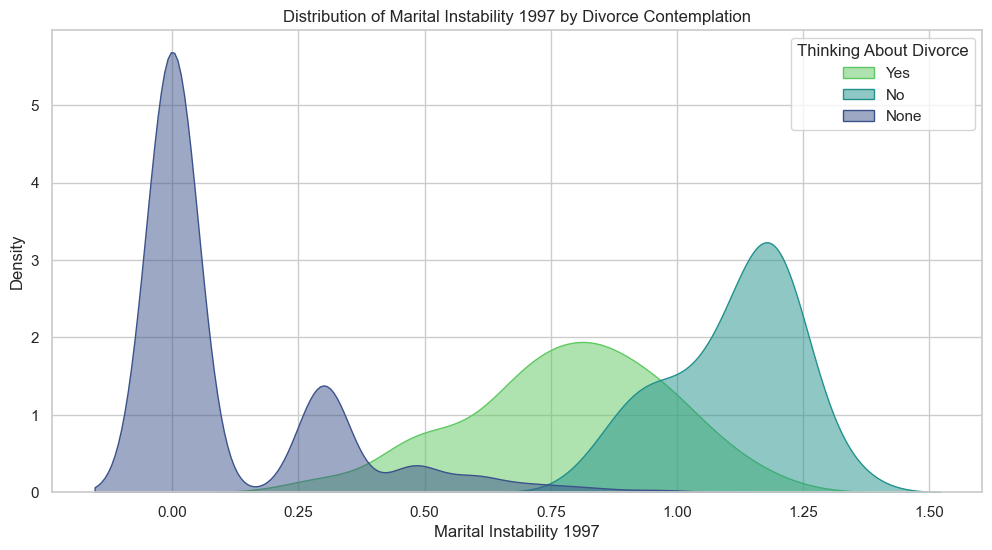

In [451]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['r_thinking_about_divorce_now'] = df['r_thinking_about_divorce_now'].replace({3: None, 2: 'No', 1: 'Yes'})

# Drop rows where 'r_thinking_about_divorce_now' or 'marital_instability_1997' are NaN
df_cleaned = df.dropna(subset=['r_thinking_about_divorce_now', 'marital_instability_1997'])

# Set plot style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Plot the distribution with KDE
sns.kdeplot(
    data=df_cleaned, 
    x='marital_instability_1997', 
    hue='r_thinking_about_divorce_now', 
    fill=True, 
    common_norm=False, 
    palette="viridis", 
    alpha=0.5
)

# Add labels for clarity
plt.xlabel('Marital Instability 1997')
plt.ylabel('Density')
plt.title('Distribution of Marital Instability 1997 by Divorce Contemplation')
plt.legend(title="Thinking About Divorce", labels=["Yes", "No", "None"])
plt.show()

C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\2074115090.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['marital_happiness_bins'] = pd.cut(df['marital_happiness_1997'], bins=happiness_bins, labels=happiness_labels, right=True)
C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\2074115090.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['marital_disagreements_bins'] = pd.cut(df['marital_disagreements_1997'], bins=disagreement_bins, labels=disagreement_labels, right=True)


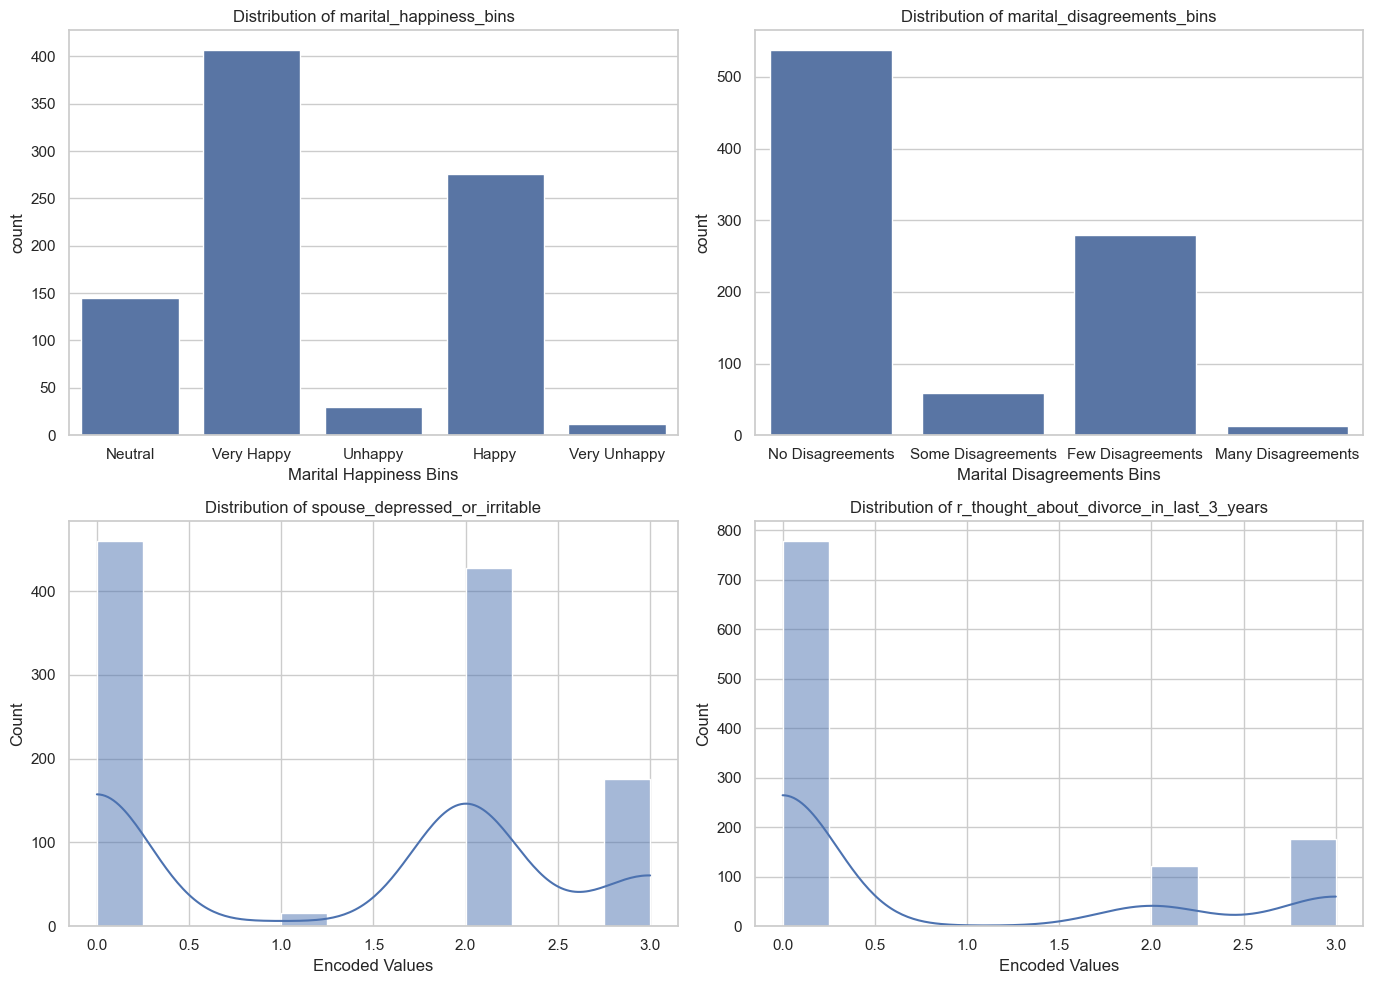

In [454]:


# Define the happiness bins
happiness_bins =  [11, 15.5, 20, 24.5, 29, 34]
happiness_labels = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']  # 4 labels for 4 bins

# Create a new column for marital happiness bins
df['marital_happiness_bins'] = pd.cut(df['marital_happiness_1997'], bins=happiness_bins, labels=happiness_labels, right=True)

# Define the disagreements bins
disagreement_bins = [0, 3, 6, 9, 12]
disagreement_labels = ['No Disagreements', 'Few Disagreements', 'Some Disagreements', 'Many Disagreements']  # 4 labels for 4 bins

# Create a new column for marital disagreement bins
df['marital_disagreements_bins'] = pd.cut(df['marital_disagreements_1997'], bins=disagreement_bins, labels=disagreement_labels, right=True)

# Variables to plot
variables = ['marital_happiness_bins', 'marital_disagreements_bins', 
             'spouse_depressed_or_irritable', 'r_thought_about_divorce_in_last_3_years']

plt.figure(figsize=(14, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    
    # For categorical variables, use countplot
    if var == 'marital_happiness_bins' or var == 'marital_disagreements_bins':
        sns.countplot(x=df[var].dropna(), order=df[var].dropna().unique())
        plt.xlabel(var.replace('_', ' ').title())
    else:
        sns.histplot(df[var].dropna(), kde=True)
        plt.xlabel('Encoded Values')
    
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()


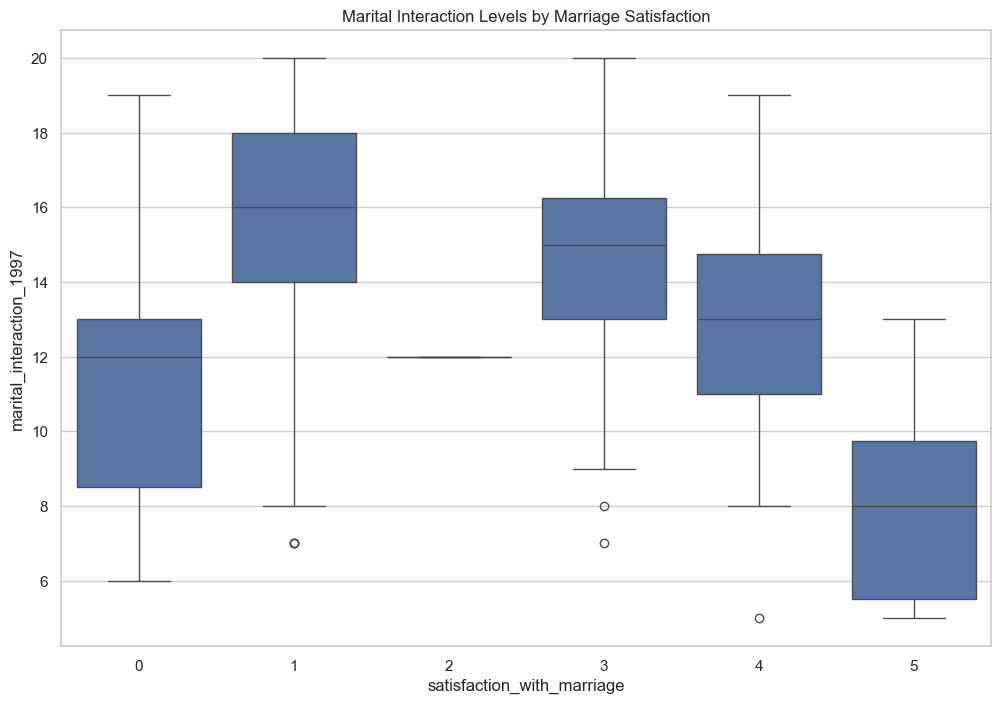

In [456]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='satisfaction_with_marriage', y='marital_interaction_1997')
plt.title('Marital Interaction Levels by Marriage Satisfaction')
plt.show()

In [469]:
# Income vs Martial instability
income_columns = [col for col in df.columns if 'income' in col.lower()]
df[income_columns+['marital_instability_1997']].corr()['marital_instability_1997'].drop('marital_instability_1997')

family_income_more_or_less_than_$20,000   -0.048695
income_category_-_less_than_$20,000       -0.062904
percent_of_income_contributed_by_r        -0.022405
percent_of_income_contributed_by_spouse    0.020519
1997_family_income_--_$65,000+             0.032567
1997_family_income_--_$105,000+           -0.000315
1997_wife's_income_--_$65,000+             0.073159
1997_wife's_income_--_$100,000+            0.058785
Name: marital_instability_1997, dtype: float64

In [471]:
# Income vs Martial happiness
income_columns = [col for col in df.columns if 'income' in col.lower()]
df[income_columns+['marital_happiness_1997']].corr()['marital_happiness_1997'].drop('marital_happiness_1997')

family_income_more_or_less_than_$20,000   -0.050896
income_category_-_less_than_$20,000       -0.000402
percent_of_income_contributed_by_r         0.037592
percent_of_income_contributed_by_spouse   -0.036248
1997_family_income_--_$65,000+             0.059358
1997_family_income_--_$105,000+            0.064800
1997_wife's_income_--_$65,000+             0.052398
1997_wife's_income_--_$100,000+            0.065720
Name: marital_happiness_1997, dtype: float64

This can be interpreted as income status of spouse or respondent does not affect on their martial status.

In [474]:
threshold = 0.6 * len(df)  # 80% of the number of rows
df_cleaned = df.dropna(thresh=threshold, axis=1)

print("New shape:", df_cleaned.shape)

New shape: (1079, 498)


# Wave 6 (2000)

In [719]:
df = pd.read_csv("df_2000.csv", low_memory=False)

In [721]:
df = df.iloc[:, 1:]
df.head()

,marital_status_of_respondent,age_on_last_birthday,respondents_years_of_schooling,"in_addition_to_you,_is_there_anyone_else",sex_of_person_2,relation_of_person_2_to_resp,other_relative_person_2,other_non-relative_person_2,whether_the_child_is_biological_or_not,whether_the_child_is_biological_or_not.1,...,other_changes.6,other_changes.7,other_changes.8,sexrole_traditionalism_scale_2000,marital_interaction_2000,marital_problems_2000,marital_happiness_2000,marital_disagreement_2000,marital_instability_index_for_2000,marital_instability_2000
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Married,42.0,12,Yes,Female,SPOUSE OF RESPONDENT,NaN,NaN,NaN,Child from current marriage,...,NaN,NaN,NaN,16.0,17.0,3.0,24.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Married,48.0,18,Yes,Male,SPOUSE OF RESPONDENT,NaN,NaN,NaN,Child from current marriage,...,NaN,NaN,NaN,16.0,10.0,0.0,22.5,3.0,0.0,0.0
4,Divorced,53.0,12,Yes,Female,OTHER / NON-RELATIVE -SPECIFY,NaN,renter,NaN,NaN,...,NaN,NaN,NaN,15.0,NaN,99.0,NaN,NaN,NaN,NaN


In [723]:
df.drop_duplicates(inplace=True)
person_n_list = [col for col in df.columns if 'relation_of_person_' in col.lower()]
print(person_n_list)

['relation_of_person_2_to_resp', 'relation_of_person_3_to_resp', 'relation_of_person_4_to_resp', 'relation_of_person_5_to_resp', 'relation_of_person_6_to_resp', 'relation_of_person_7_to_resp', 'relation_of_person_8_to_resp', 'relation_of_person_9_to_resp', 'relation_of_person_10_to_resp']


In [725]:
len(df)

964

In [727]:
for i in df[person_n_list]:
    print(df[i].value_counts() / len(df) * 100)
    print()
    # print(df[i].value_counts())

relation_of_person_2_to_resp
SPOUSE OF RESPONDENT              82.780083
CHILD OF RESPONDENT/SPOUSE         5.497925
PARTNER OR BOYFRIEND/GIRLFIEND     1.763485
OTHER / NON-RELATIVE -SPECIFY      0.829876
GRANDCHILD OF RESPONDENT           0.207469
OTHER RELATIVE -SPECIFY            0.103734
PARENT OF RESPONDENT               0.103734
Name: count, dtype: float64

relation_of_person_3_to_resp
CHILD OF RESPONDENT/SPOUSE       34.647303
OTHER RELATIVE -SPECIFY           1.556017
GRANDCHILD OF RESPONDENT          1.244813
PARENT OF RESPONDENT              0.622407
OTHER / NON-RELATIVE -SPECIFY     0.414938
Name: count, dtype: float64

relation_of_person_4_to_resp
CHILD OF RESPONDENT/SPOUSE        18.360996
GRANDCHILD OF RESPONDENT           1.037344
OTHER RELATIVE -SPECIFY            0.518672
OTHER / NON-RELATIVE -SPECIFY      0.311203
PARTNER OR BOYFRIEND/GIRLFIEND     0.103734
PARENT OF RESPONDENT               0.103734
SPOUSE OF RESPONDENT               0.103734
Name: count, dtype: floa

In [729]:
# same as df 1997
df = df.drop(columns=[col for col in df.columns if 'person_' in col.lower() and any(str(i) in col for i in range(6,11))])

In [731]:
# dropping columns relating to previous studies
previous_waves = [
    col for col in df.columns if any(i in col for i in ["1980", "1983", "1988", "1992", "1997"])
]
df.drop(columns=previous_waves, inplace=True)
changes = [col for col in df.columns if "change" in col]
changes = changes[:-3]
df.drop(columns=changes, inplace=True)

In [733]:
possible_nan = [
    "DK",
    "INAP",
    "REF",
    "97",
    "997",
    "9997",
    "99997",
    "999997",
    "97.0",
    "997.0",
    "9997.0",
    "99997.0",
    "999997.0",
]
df.replace(
    to_replace=possible_nan,
    value=None,
    inplace=True,
)


# try converting to numerical
for col in df.columns:
    df[col] = df[col].astype(np.float32, errors="ignore")

In [735]:
for k, v in pd.Series(df.values.flatten()).value_counts().items():
    print(f"{k:<50} |  {v}")

No                                                 |  30579
Yes                                                |  17029
Agree                                              |  12498
Disagree                                           |  10275
Never                                              |  9265
Not at all difficult                               |  9205
Strongly agree                                     |  6519
40.0                                               |  6018
60.0                                               |  5833
Very happy                                         |  5577
50.0                                               |  5393
Almost never                                       |  5278
0.0                                                |  4214
Strongly disagree                                  |  4008
Nearly always                                      |  3871
Great deal                                         |  3734
1.0                                                |

In [737]:
# which columns could contain nullable values
possible_nan.extend([97.0, 997.0, 9997.0])
for col in df.columns:
    is_nan = set(df[col].values).intersection(set(possible_nan))
    if is_nan:
        print(f"{col:<50} | {is_nan}")

how_long_ago_did_you_divorce?                      | {97.0}


In [738]:
for col in df.columns:
    is_nan = set(df[col].values).intersection(set(possible_nan))
    if is_nan:
        df[col] = df[col].replace(to_replace=is_nan, value=None)

In [739]:
for col in df.columns:
    df[col] = df[col].astype(np.float32, errors="ignore")

In [740]:
# perform label encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))


In [745]:
corr = df.corr()['marital_instability_2000']
corr_df = corr.reindex(corr.abs().sort_values(ascending=False).index)
print(corr_df.drop('marital_instability_2000'))

marital_instability_index_for_2000              0.915656
r_thinking_about_divorce_now                   -0.680133
feels_marriage_in_trouble_now                  -0.676986
either_partner_suggested_idea_of_divorce       -0.673963
talked_with_others_recently                    -0.667335
spouse_talked_to_others_recently               -0.655471
spouse_feel_marriage_in_trouble_now            -0.646433
spouse_thinking_of_divorce_now                 -0.638645
wished_you_lived_apart_from_spouse              0.620008
either_suggested_divorce_in_last_3_years       -0.574051
either_filed_a_petition                        -0.567109
either_consulted_an_attorney                   -0.564978
divorce_talk_-_filing                          -0.560753
marital_happiness_2000                         -0.557235
divorce_talk_-_who_started                     -0.556492
divorce_talk_-_consulting_attorney             -0.552278
divorce_talk_-_dividing_property               -0.546904
divorce_talk_-_r_speak_in_favor

In [664]:
# top 5 correlated columns to martial instability

corr_df[1:6]

marital_instability_index_for_2000          0.915656
r_thinking_about_divorce_now               -0.680133
feels_marriage_in_trouble_now              -0.676986
either_partner_suggested_idea_of_divorce   -0.673963
talked_with_others_recently                -0.667335
Name: marital_instability_2000, dtype: float64

In [666]:
df_origin = pd.read_csv("df_2000.csv", low_memory=False)
df_origin['r_thinking_about_divorce_now'].value_counts()

r_thinking_about_divorce_now
No     56
Yes     7
DK      4
Name: count, dtype: int64

In [667]:
df['r_thinking_about_divorce_now'].value_counts()

r_thinking_about_divorce_now
3    897
0     56
2      7
1      4
Name: count, dtype: int64

C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\3884794927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['marital_happiness_bins'] = pd.cut(df['marital_happiness_2000'], bins=happiness_bins, labels=happiness_labels, right=True)
C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\3884794927.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['marital_disagreements_bins'] = pd.cut(df['marital_disagreement_2000'], bins=disagreement_bins, labels=disagreement_labels, right=True)


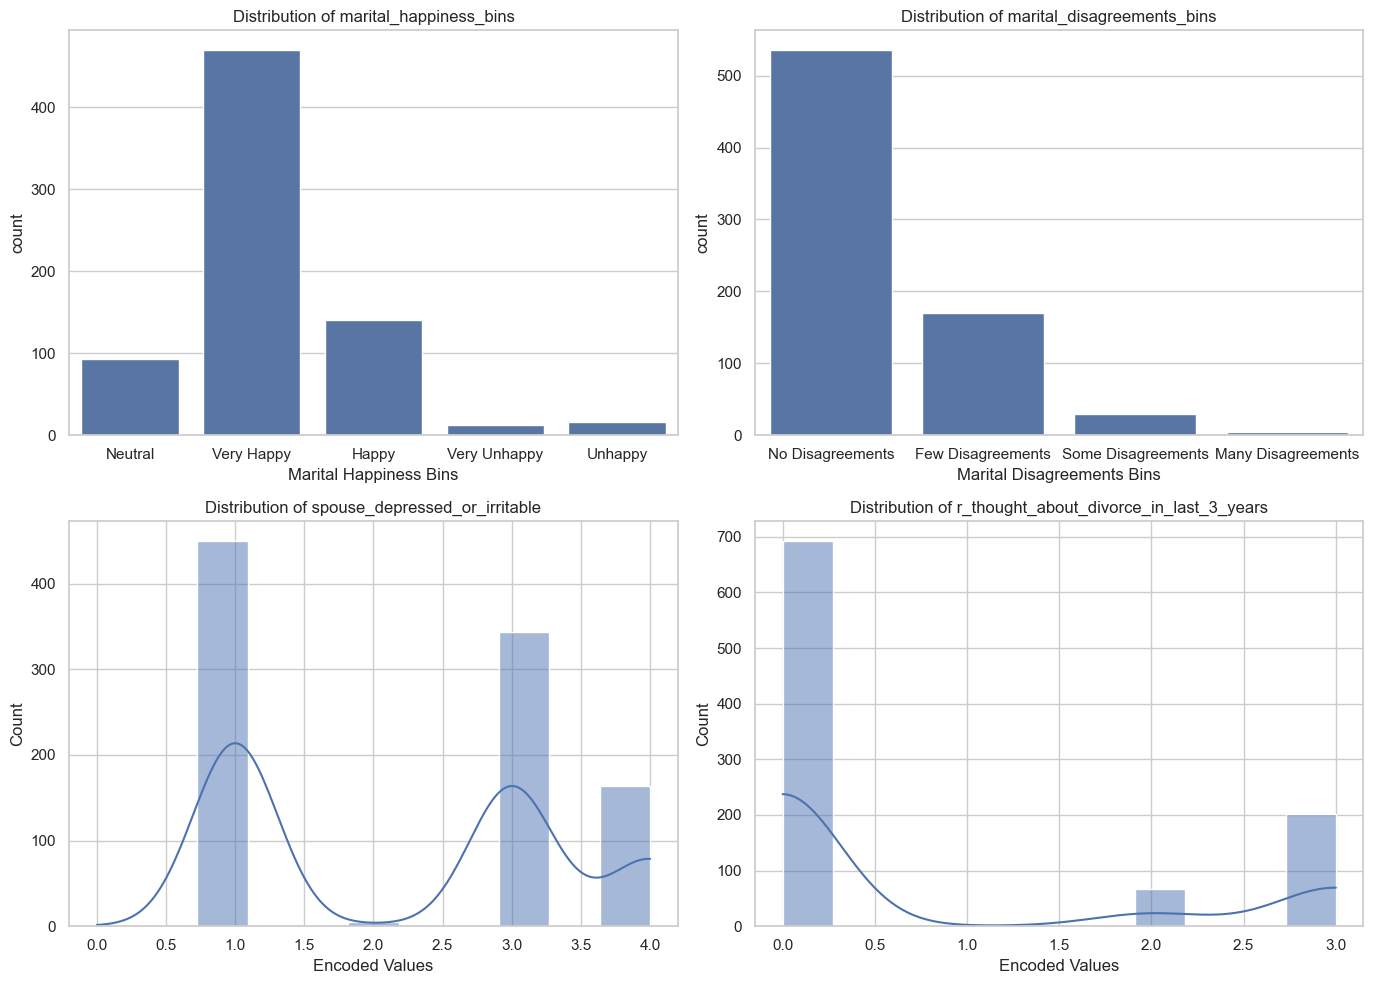

In [668]:


# Define the happiness bins
happiness_bins =  [11, 15.5, 20, 24.5, 29, 34]
happiness_labels = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']  
# Create a new column for marital happiness bins
df['marital_happiness_bins'] = pd.cut(df['marital_happiness_2000'], bins=happiness_bins, labels=happiness_labels, right=True)

# Define the disagreements bins
disagreement_bins = [0, 3, 6, 9, 12]
disagreement_labels = ['No Disagreements', 'Few Disagreements', 'Some Disagreements', 'Many Disagreements']  

# Create a new column for marital disagreement bins
df['marital_disagreements_bins'] = pd.cut(df['marital_disagreement_2000'], bins=disagreement_bins, labels=disagreement_labels, right=True)

# Variables to plot
variables = ['marital_happiness_bins', 'marital_disagreements_bins', 
             'spouse_depressed_or_irritable', 'r_thought_about_divorce_in_last_3_years']

plt.figure(figsize=(14, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    
    # For categorical variables, use countplot
    if var == 'marital_happiness_bins' or var == 'marital_disagreements_bins':
        sns.countplot(x=df[var].dropna(), order=df[var].dropna().unique())
        plt.xlabel(var.replace('_', ' ').title())
    else:
        sns.histplot(df[var].dropna(), kde=True)
        plt.xlabel('Encoded Values')
    
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()


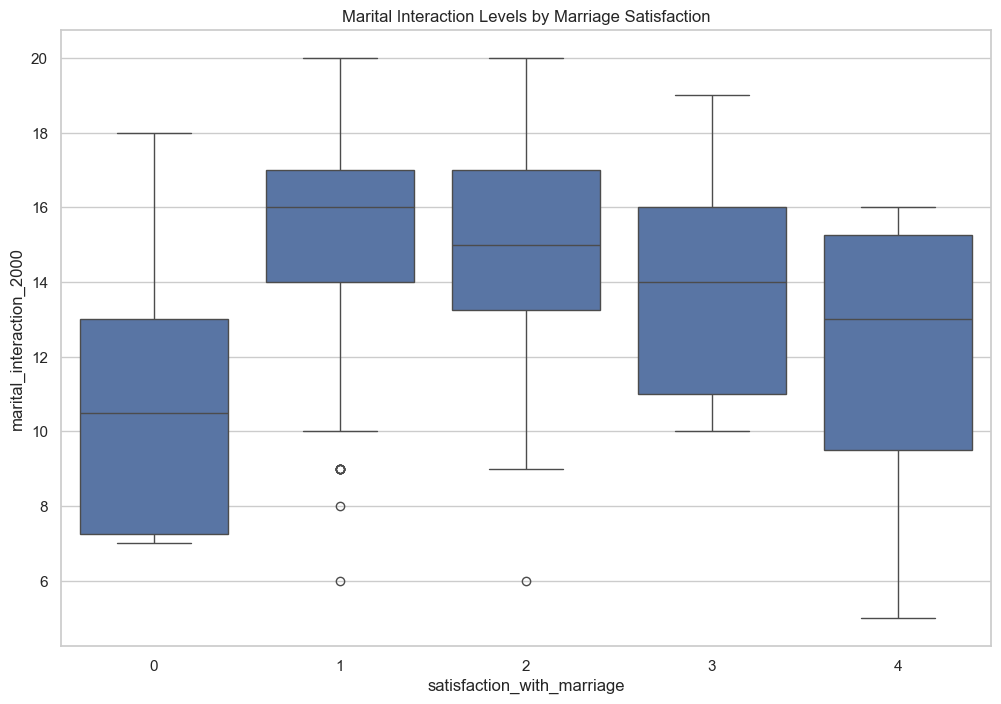

In [672]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='satisfaction_with_marriage', y='marital_interaction_2000')
plt.title('Marital Interaction Levels by Marriage Satisfaction')
plt.show()

In [678]:
marriage_problem = [col for col in df_origin.columns if 'marriage_problem:' in col.lower()]
correlation_results = df[marriage_problem + ['marital_instability_2000']].corr()['marital_instability_2000'].drop('marital_instability_2000')
correlation_results

marriage_problem:_get_angry_easily        0.255723
marriage_problem:_easily_hurt             0.201329
marriage_problem:_jealousy                0.234503
marriage_problem:_domineering             0.327908
marriage_problem:_critical                0.163182
marriage_problem:_moodiness               0.237157
marriage_problem:_not_talking             0.187960
marriage_problem:_uninterested_in_sex     0.148691
marriage_problem:_sex_w/_others           0.047828
marriage_problem:_irritating_habits       0.153736
marriage_problem:_not_home_enough         0.104029
marriage_problem:_spend_money_unwisely    0.126480
marriage_problem:_drug_abuse              0.115038
Name: marital_instability_2000, dtype: float64

In [682]:
673989/278154454

0.002423074627451409

Blank

In [747]:
marriage_problem = [col for col in df_origin.columns if 'marriage_problem:' in col.lower()]
correlation_results = df[marriage_problem + ['marital_instability_2000']].corr()['marital_instability_2000'].drop('marital_instability_2000')
correlation_results

marriage_problem:_get_angry_easily        0.255723
marriage_problem:_easily_hurt             0.201329
marriage_problem:_jealousy                0.234503
marriage_problem:_domineering             0.327908
marriage_problem:_critical                0.163182
marriage_problem:_moodiness               0.237157
marriage_problem:_not_talking             0.187960
marriage_problem:_uninterested_in_sex     0.148691
marriage_problem:_sex_w/_others           0.047828
marriage_problem:_irritating_habits       0.153736
marriage_problem:_not_home_enough         0.104029
marriage_problem:_spend_money_unwisely    0.126480
marriage_problem:_drug_abuse              0.115038
Name: marital_instability_2000, dtype: float64

In [749]:
correlation_results.index = correlation_results.index.str.replace(r'marriage_problem:|', '', regex=True)
correlation_results.index = correlation_results.index.str.replace('_', ' ')
correlation_results

 get angry easily        0.255723
 easily hurt             0.201329
 jealousy                0.234503
 domineering             0.327908
 critical                0.163182
 moodiness               0.237157
 not talking             0.187960
 uninterested in sex     0.148691
 sex w/ others           0.047828
 irritating habits       0.153736
 not home enough         0.104029
 spend money unwisely    0.126480
 drug abuse              0.115038
Name: marital_instability_2000, dtype: float64

C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\725008726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_results.index, y=correlation_results.values, palette='viridis')


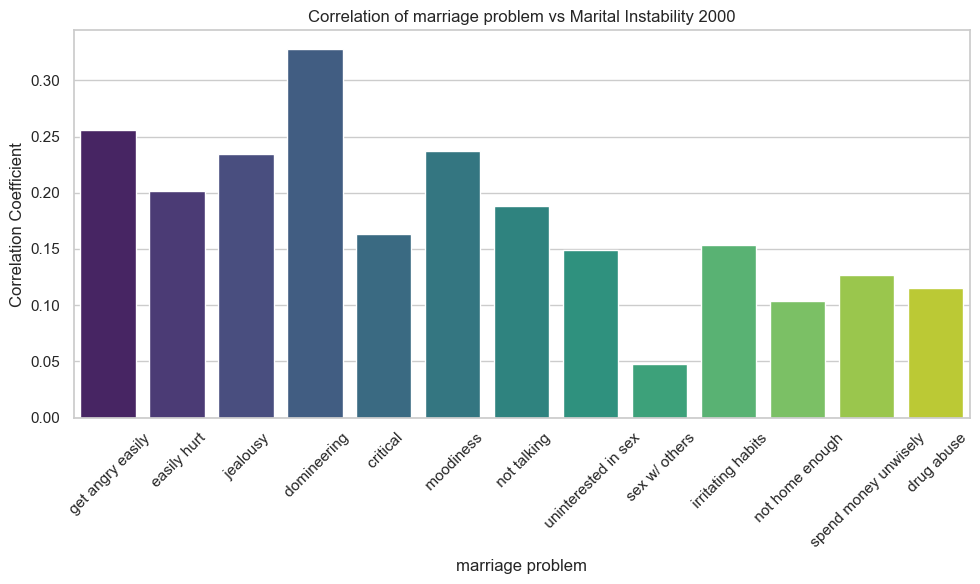

In [751]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_results.index, y=correlation_results.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation of marriage problem vs Marital Instability 2000')
plt.xlabel('marriage problem')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()  
plt.show()

In [709]:
satisfaction = [col for col in df_origin.columns if 'satisfaction:' in col.lower()]
correlation_results = df[satisfaction + ['marital_instability_1997']].corr()['marital_instability_1997'].drop('marital_instability_1997')
correlation_results

KeyError: "['marital_instability_1997'] not in index"

In [591]:
correlation_results.index = correlation_results.index.str.replace(r'satisfaction:|', '', regex=True)
correlation_results.index = correlation_results.index.str.replace('_', ' ')
correlation_results

 understanding               -0.472509
 amount of love received     -0.480470
 agreement w/ spouse         -0.444765
 getting along w/ children   -0.317424
 spouse as breadwinner        0.003881
 spouse's household work     -0.317787
 activities w/ spouse        -0.499695
 spouse's faithfulness       -0.284271
 financial situation         -0.283458
 with home                   -0.217691
Name: marital_instability_1997, dtype: float64

C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\1307227505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_results.index, y=correlation_results.values, palette='viridis')


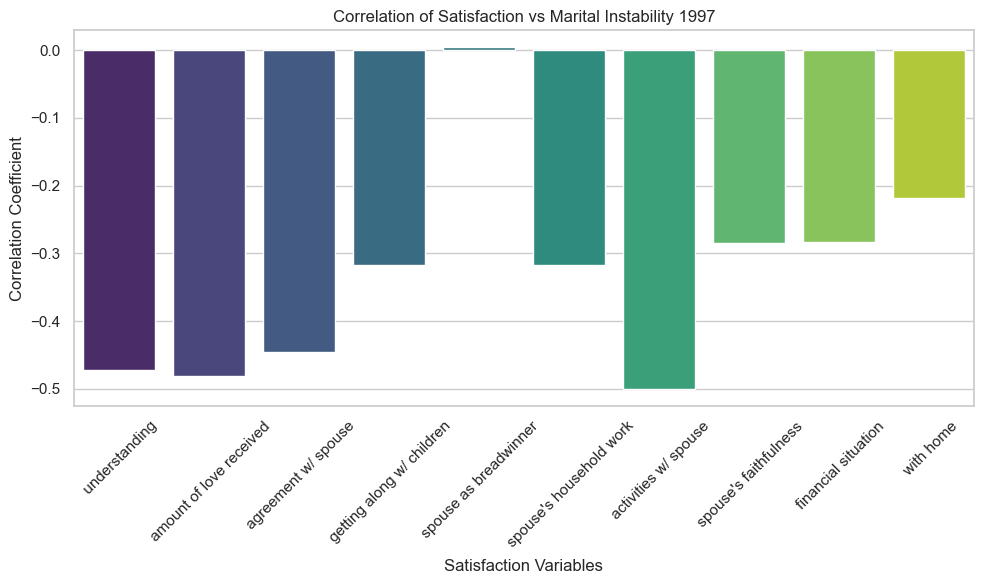

In [593]:
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_results.index, y=correlation_results.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation of Satisfaction vs Marital Instability 1997')
plt.xlabel('Satisfaction Variables')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()  
plt.show()

In [611]:
divorce_worries = [col for col in df.columns if 'divorce_worries:' in col.lower()]
divorce_corr = df[divorce_worries + ['marital_instability_1997']].corr()['marital_instability_1997'].drop('marital_instability_1997')
df[divorce_worries + ['marital_instability_1997']].corr()['marital_instability_1997']

divorce_worries:_financial_security       NaN
divorce_worries:_moving_away              NaN
divorce_worries:_dividing_the_property    NaN
divorce_worries:_spouse's_dependence      NaN
divorce_worries:_r's_dependence           NaN
divorce_worries:_religious_beliefs        NaN
divorce_worries:_children's_welfare       NaN
divorce_worries:_children's_approval      NaN
divorce_worries:_losing_children          NaN
divorce_worries:_family_opinions          NaN
marital_instability_1997                  1.0
Name: marital_instability_1997, dtype: float64

In [621]:
temp_df = df[divorce_worries + ['marital_instability_1997']].copy()
temp_df.fillna(0, inplace=True)
divorce_corr = temp_df.corr()['marital_instability_1997'].drop('marital_instability_1997')

print(divorce_corr)

divorce_worries:_financial_security       0.182743
divorce_worries:_moving_away              0.183455
divorce_worries:_dividing_the_property    0.183322
divorce_worries:_spouse's_dependence      0.184058
divorce_worries:_r's_dependence           0.184177
divorce_worries:_religious_beliefs        0.175222
divorce_worries:_children's_welfare       0.168637
divorce_worries:_children's_approval      0.161955
divorce_worries:_losing_children          0.179473
divorce_worries:_family_opinions          0.181895
Name: marital_instability_1997, dtype: float64


C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\1494245885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=divorce_corr.index, y=divorce_corr.values, palette='viridis')


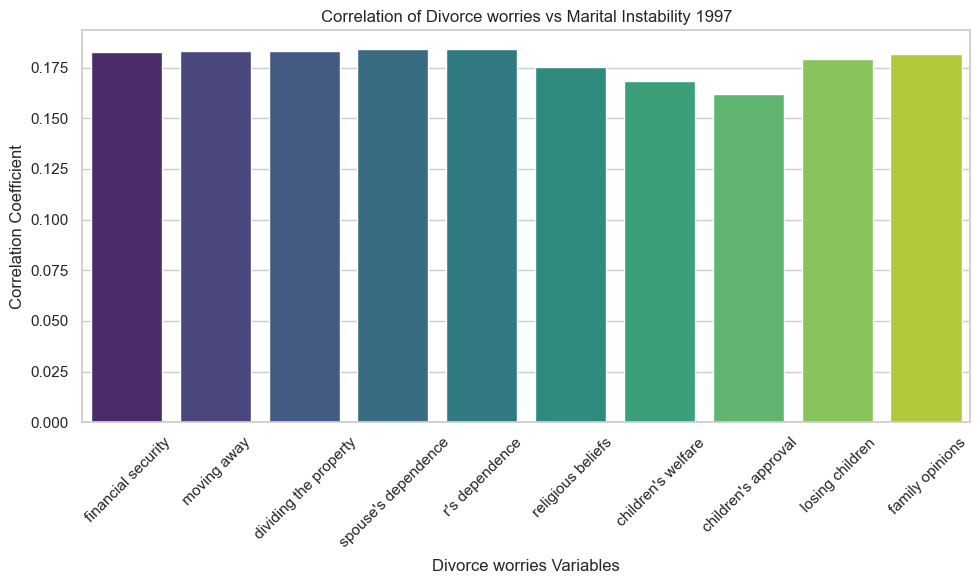

In [705]:
divorce_corr.index = divorce_corr.index.str.replace(r'divorce_worries:|', '', regex=True)
divorce_corr.index = divorce_corr.index.str.replace('_', ' ')


plt.figure(figsize=(10, 6))
sns.barplot(x=divorce_corr.index, y=divorce_corr.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation of Divorce worries vs Marital Instability 1997')
plt.xlabel('Divorce worries Variables')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()  
plt.show()

In [377]:
df_origin = pd.read_csv("df_1997.csv", low_memory=False)

In [391]:
for k, v in pd.Series(df_origin.values.flatten()).value_counts().items():
    # print(f"{k:<50} |  {v}")
    if isinstance(k, str):
        print(k)

No
Yes
Agree
Disagree
Never
Very happy
Sometimes
Great deal
Pretty happy
Strongly agree
Not true
Strongly disagree
Quite a bit
Child from current marriage
Often
Some
Very close
Fair
DK
Same
Male
Pretty close
Married
Getting better
Female
Weekly
A little
Pretty important
0
Sometimes true
Usually
Very important
Hardly any
2
Better
Working full-time
Occasionally
Not very important
1
Good spirits
Spoke freely
Received Respondents Name and Full Addr
Not important at all
12
1992 Household Information Correct
$20,000 or more
3
SPOUSE OF RESPONDENT
CHILD OF RESPONDENT/SPOUSE
Less than once a month
Good
Yes,
Daily
Staying the same
Not too happy
Yes, self
Same person
2E3
Excellent
Part-time
50
4
Very satisfied
10
female
5
Full-time
Rarely
Not at all
No Changes
Moderately satisfied
Young for age
Almost always
Not very close
Not work
Own
40
About the same
Never Married
14
6
Monthly
Very good spirits
Child from respondents previous marriag
professional technical and kindred worke
Somewhat strict
No

In [395]:
categorical_columns = df_origin.select_dtypes(include=['object']).columns
categorical_columns

Index(['state_of_residence_1997', 'sex_of_respondent',
       'marital_status_of_respondent', 'age_on_last_birthday',
       'respondent's_years_of_schooling',
       'is_there_a_second_person_in_household', 'sex_of_person_2',
       'relation_of_person_2_to_resp.',
       'whether_the_child_is_biological_or_not',
       'whether_the_child_is_biological_or_not.1',
       ...
       'do_spouses_hold_any_property_separately', 'interviewer_directions',
       'received_child_information', 'child_from_1980_marriage',
       'received_information_on_2nd_child', '2nd_child_from_1980_marriage',
       'received_information_on_child/ren', 'able_to_speak_freely',
       'received_reference_information',
       'number_of_tracking_references_received'],
      dtype='object', length=525)

In [627]:
[col for col in df.columns if 'age' in col.lower()]

['age_on_last_birthday',
 'age_of_person_2',
 'age_of_person_3',
 'age_of_person_4',
 'age_of_person_5',
 'age_of_child_1_not_living_with_r',
 'age_of_child_2',
 'age_of_child_3_not_living_with_r',
 'age_of_child_4_not_living_with_r',
 'age_of_child_5_not_living_with_r',
 "age_compared_to_other's",
 'satisfaction_with_marriage',
 "ok_to_divorce_if_marriage_doesn't_work",
 'happiness_more_important_than_marriage',
 'marriage_is_for_life',
 'children_worse_off_in_poor_marriage',
 'age_when_mother_died',
 "age_at_father's_death?",
 "age_at_parents'_separation",
 'engaged_or_living_together',
 'engaged_or_living_together.1',
 'engaged_or_living_together.2',
 'engaged_or_living_together.3',
 'live_with_ex-spouse_before_marriage',
 'give_more_to_the_marriage_than_other',
 'marriage_problem:_get_angry_easily',
 'marriage_problem:_easily_hurt',
 'marriage_problem:_jealousy',
 'marriage_problem:_domineering',
 'marriage_problem:_critical',
 'marriage_problem:_moodiness',
 'marriage_problem:_not

In [637]:
df_origin.iloc[:, :15].head()

,Unnamed: 0,number_of_calls,length_of_interview,date_of_interview_1997,year_of_5th_wave_interview,day_of_month_of_5th_wave_inter.,month_of_5th_wave_interveiw,decimal_year_of_5th_wave_interview,1997_central_office_code,state_of_residence_1997,1997_region_of_country,interviewer_number,sex_of_respondent,marital_status_of_respondent,age_on_last_birthday
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6.0,38.0,30497.0,97.0,4.0,3.0,97.27,453.0,VT,3.0,334.0,male,Married,39
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2.0,55.0,20997.0,97.0,9.0,2.0,97.20,694.0,FL,4.0,271.0,female,Married,44
4,4,2.0,47.0,20997.0,97.0,9.0,2.0,97.20,736.0,IN,2.0,159.0,female,Separated,49


In [760]:
[col for col in df97 if 'remarried' in col.lower()]

['remarried_since_1988']

In [762]:
columns = ['marital_instability_1997', 'marital_happiness_1997', 
           'marital_problems_1997', 'marital_disagreements_1997', 
           'age_on_last_birthday']
marital_data = df97[columns]

In [766]:
marital_data.dropna(subset=['age_on_last_birthday'], inplace=True)

C:\Users\pumad\AppData\Local\Temp\ipykernel_27256\3661612192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marital_data.dropna(subset=['age_on_last_birthday'], inplace=True)
